# Import and Merge Data

In [20]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn

In [23]:
#import data and merge the macro onto the train and test
train_df = pd.read_csv("train.csv", parse_dates=['timestamp'])
test_df = pd.read_csv("test.csv", parse_dates=['timestamp'])
macro_df = pd.read_csv("macro.csv", parse_dates=['timestamp'])
train_df = pd.merge(train_df, macro_df, how='left', on='timestamp')
test_df = pd.merge(test_df, macro_df, how='left', on='timestamp')
print(train_df.shape, test_df.shape)

#truncate the extreme values in price_doc
ulimit = np.percentile(train_df.price_doc.values, 99)
llimit = np.percentile(train_df.price_doc.values, 1)
train_df['price_doc'].loc[train_df['price_doc']>ulimit] = ulimit
train_df['price_doc'].loc[train_df['price_doc']<llimit] = llimit

((30471, 391), (7662, 390))


In [24]:
#import data and merge the macro onto the train and test
trainsm_df = pd.read_csv("train_small.csv", parse_dates=['timestamp'])
testsm_df = pd.read_csv("test_small.csv", parse_dates=['timestamp'])
macrosm_df = pd.read_csv("macro_small.csv", parse_dates=['timestamp'])
trainsm_df = pd.merge(trainsm_df, macrosm_df, how='left', on='timestamp')
testsm_df = pd.merge(testsm_df, macrosm_df, how='left', on='timestamp')
print(trainsm_df.shape, testsm_df.shape)

#truncate the extreme values in price_doc
ulimit = np.percentile(trainsm_df.price_doc.values, 99)
llimit = np.percentile(trainsm_df.price_doc.values, 1)
trainsm_df['price_doc'].loc[trainsm_df['price_doc']>ulimit] = ulimit
trainsm_df['price_doc'].loc[trainsm_df['price_doc']<llimit] = llimit

((30471, 132), (7662, 131))


Adding a column to label the major area of each sub_area

In [27]:
okurg_df = pd.read_csv("okurg.csv")

In [28]:
trainsm_df = pd.merge(trainsm_df, okurg_df, how='left', on='sub_area')
testsm_df = pd.merge(testsm_df, okurg_df, how='left', on='sub_area')

In [31]:
trainsm_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,rent_price_4+room_bus,sd_oil_yearly,sd_cpi_yearly,sd_ppi_yearly,sd_eurrub_yearly,sd_brent_yearly,sd_micex_yearly,sd_mortgage_yearly,sd_rent_yearly,okurg_district
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,136.11,6.269592,5.080692,13.540192,1.085887,7.113732,146.135335,0.361158,16.374863,North Eastern
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,136.11,6.269592,5.080692,13.540192,1.085887,7.113732,146.135335,0.361158,16.374863,Southern
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,136.11,6.269592,5.080692,13.540192,1.085887,7.113732,146.135335,0.361158,16.374863,South Eastern
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,155.22,6.269592,5.080692,13.540192,1.085887,7.113732,146.135335,0.361158,16.374863,North Western
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,155.22,6.269592,5.080692,13.540192,1.085887,7.113732,146.135335,0.361158,16.374863,Central


Checking to See what DATATYPES we have in the data

In [32]:
dtype_df = trainsm_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,22
1,datetime64[ns],1
2,float64,107
3,object,3


Converting Categorical Variables into labels using LabelEncoder

In [34]:
from sklearn import model_selection, preprocessing

In [35]:
for f in trainsm_df.columns:
    if trainsm_df[f].dtype=='object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(trainsm_df[f].values.astype('str')) + list(testsm_df[f].values.astype('str')))
        trainsm_df[f] = lbl.transform(list(trainsm_df[f].values.astype('str')))
        testsm_df[f] = lbl.transform(list(testsm_df[f].values.astype('str')))

product_type
sub_area
okurg_district


# New Variables

Adding some new columns to describe the trends in data

In [41]:
trainsm_df["gender_ratio"] = trainsm_df["female_f"] / trainsm_df["full_all"].astype("float")
testsm_df["gender_ratio"] = testsm_df["female_f"] / testsm_df["full_all"].astype("float")
testsm_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_oil_yearly,sd_cpi_yearly,sd_ppi_yearly,sd_eurrub_yearly,sd_brent_yearly,sd_micex_yearly,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8.009779,14.48209,24.372704,7.036363,8.039559,71.295861,0.717897,27.602766,7,0.535354
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,8.009779,14.48209,24.372704,7.036363,8.039559,71.295861,0.717897,27.602766,5,0.530804
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,8.009779,14.48209,24.372704,7.036363,8.039559,71.295861,0.717897,27.602766,1,0.551308
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,8.009779,14.48209,24.372704,7.036363,8.039559,71.295861,0.717897,27.602766,5,0.525908
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,8.009779,14.48209,24.372704,7.036363,8.039559,71.295861,0.717897,27.602766,5,0.530804


In [91]:
testsm_df.head()
trainsm_df.head()
#looks like one of the ratios for elder/youth is more than one... would need to fix

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio,gender_ratio_work,elder_ratio,youth_ratio,pop_density,sq_metr,log_price_doc
0,1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,2,0.530462,0.467686,0.232760,0.135976,0.024279,43.0,15.581952
1,2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,8,0.551675,0.492521,0.255141,0.136339,0.012029,34.0,15.607270
2,3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,6,0.548195,0.498123,0.248673,0.128092,0.021153,43.0,15.555977
3,4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,3,0.535429,0.501250,0.165454,0.160041,0.014183,89.0,16.388123
4,5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,0,0.520139,0.496848,0.247386,0.123582,0.012880,77.0,16.608603


In [42]:
trainsm_df["gender_ratio_work"] = trainsm_df["work_female"] / trainsm_df["work_all"].astype("float")
testsm_df["gender_ratio_work"] = testsm_df["work_female"] / testsm_df["work_all"].astype("float")

In [44]:
trainsm_df["elder_ratio"] = trainsm_df["ekder_all"] / trainsm_df["full_all"].astype("float")
testsm_df["elder_ratio"] = testsm_df["ekder_all"] / testsm_df["full_all"].astype("float")

In [88]:
trainsm_df["elder_ratio"] = trainsm_df["ekder_all"] / (trainsm_df["young_all"] + trainsm_df["work_all"] + trainsm_df["ekder_all"]).astype("float")
testsm_df["elder_ratio"] = testsm_df["ekder_all"] / testsm_df["full_all"].astype("float")

In [90]:
trainsm_df["youth_ratio"] = trainsm_df["young_all"] / (trainsm_df["young_all"] + trainsm_df["work_all"] + trainsm_df["ekder_all"]).astype("float")
testsm_df["youth_ratio"] = testsm_df["young_all"] / testsm_df["full_all"].astype("float")

In [62]:
trainsm_df["pop_density"] = trainsm_df["raion_popul"] / trainsm_df["area_m"].astype("float")
testsm_df["pop_density"] = testsm_df["raion_popul"] / testsm_df["area_m"].astype("float")

# Clean up some of the material and physical descriptor variables

This is cleaning up the **train and test** data using Shu's Notebook:

In [51]:
print(trainsm_df["material"].value_counts(dropna=False))
print(testsm_df["material"].value_counts(dropna=False))

 1.0    14197
NaN      9573
 2.0     2993
 5.0     1561
 4.0     1344
 6.0      803
Name: material, dtype: int64
 1.0    5241
 2.0     958
 4.0     619
 5.0     487
 6.0     356
NaN        1
Name: material, dtype: int64


In [50]:
trainsm_df.loc[trainsm_df["material"] == 3, "material"] = np.nan
testsm_df.loc[testsm_df["material"] == 3, "material"] = np.nan

In [54]:
print(trainsm_df['state'].value_counts(dropna=False))
print(testsm_df['state'].value_counts(dropna=False))

NaN     13559
 2.0     5844
 3.0     5791
 1.0     4855
 4.0      422
Name: state, dtype: int64
 2.0    2662
 1.0    2266
 3.0    1913
NaN      694
 4.0     127
Name: state, dtype: int64


In [53]:
trainsm_df.loc[trainsm_df["state"] == 33, "state"] = 3

In [55]:
trainsm_df.loc[trainsm_df['max_floor'] == 117, "max_floor"] = 17
trainsm_df.loc[trainsm_df['max_floor'] > 60, "max_floor"] = np.nan
#putting the suspicious ones into NaNs

In [56]:
trainsm_df.loc[trainsm_df['floor'] > 60]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_eurrub_yearly,sd_brent_yearly,sd_micex_yearly,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio,gender_ratio_work,elder_ratio,youth_ratio
23565,23587,2014-10-15,57,33.0,77.0,22.0,1.0,1986.0,2.0,10.0,...,6.599686,14.648207,68.573449,0.2204,16.823747,7,0.547351,0.512307,0.377334,0.160657


In [57]:
trainsm_df.loc[trainsm_df['floor'] == 77, "floor"] = 7
#fixing the floor variable

In [59]:
trainsm_df['build_year'].value_counts(dropna=False).sort_index()
testsm_df['build_year'].value_counts(dropna=False).sort_index()

 0.0        369
 1.0        187
 2.0          1
 215.0        1
 1875.0       1
 1890.0       2
 1895.0       1
 1898.0       1
 1902.0       1
 1905.0       1
 1906.0       1
 1908.0       1
 1910.0       1
 1911.0       3
 1912.0       1
 1914.0       2
 1917.0       3
 1924.0       1
 1926.0       8
 1927.0       3
 1928.0       6
 1929.0       4
 1930.0       3
 1931.0       3
 1932.0       3
 1933.0       1
 1935.0       1
 1937.0       5
 1938.0       3
 1939.0       3
           ... 
 1991.0      28
 1992.0      56
 1993.0      39
 1994.0      49
 1995.0      40
 1996.0      44
 1997.0      58
 1998.0      46
 1999.0      53
 2000.0      56
 2001.0      63
 2002.0      65
 2003.0      61
 2004.0      66
 2005.0      65
 2006.0      92
 2007.0      46
 2008.0      74
 2009.0      58
 2010.0      47
 2011.0      61
 2012.0      74
 2013.0     260
 2014.0     199
 2015.0     259
 2016.0     400
 2017.0     413
 2018.0      30
 2019.0       5
NaN        1049
Name: build_year, Length

In [60]:
trainsm_df.loc[trainsm_df['build_year'] == 20052009, 'build_year'] = 2005
trainsm_df.loc[trainsm_df['build_year'] == 215, 'build_year'] = 2015
trainsm_df.loc[trainsm_df['build_year'] == 4965, 'build_year'] = 1965
trainsm_df.loc[trainsm_df['build_year'] == 71, 'build_year'] = 1971
trainsm_df.loc[trainsm_df['build_year'] < 1800, 'build_year'] = np.nan

In [61]:
testsm_df.loc[testsm_df['build_year'] == 215, 'build_year'] = 2015
testsm_df.loc[testsm_df['build_year'] < 1800, 'build_year'] = np.nan

In [64]:
## num_room
trainsm_df.loc[trainsm_df['num_room'] > 9]
#converting the number of rooms (like 10) to missing values
#you can see that the life sq is the same as the num room

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_brent_yearly,sd_micex_yearly,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio,gender_ratio_work,elder_ratio,youth_ratio,pop_density
11629,11624,2013-10-28,40,19.0,17.0,17.0,1.0,2011.0,19.0,7.0,...,4.262096,67.400112,0.257487,10.567959,5,0.530804,0.471941,0.048398,0.032265,0.000157
17773,17767,2014-04-23,58,34.0,1.0,2.0,1.0,1992.0,10.0,10.0,...,14.648207,68.573449,0.220400,16.823747,12,0.542526,0.505093,0.067255,0.055000,0.007860
26726,26716,2014-12-18,51,30.0,14.0,17.0,1.0,1984.0,17.0,8.0,...,14.648207,68.573449,0.220400,16.823747,7,0.562807,0.513986,0.211786,0.112280,0.012994
29153,29175,2015-04-16,59,33.0,20.0,22.0,1.0,2000.0,10.0,10.0,...,8.039559,71.295861,0.717897,27.602766,6,0.544413,0.506343,0.274469,0.245536,0.021053


In [65]:
trainsm_df.loc[trainsm_df['num_room'] > 9, 'num_room'] = np.nan

In [66]:
## num_room
testsm_df.loc[testsm_df['num_room'] > 9, 'num_room'] = np.nan

In [67]:
## full_sq 
trainsm_df.loc[trainsm_df['full_sq'] > 300]

#how can we make the full sq better?

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_brent_yearly,sd_micex_yearly,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio,gender_ratio_work,elder_ratio,youth_ratio,pop_density
130,129,2011-10-15,325,325.0,7.0,NaN,NaN,NaN,NaN,NaN,...,7.113732,146.135335,0.361158,16.374863,1,0.563939,0.502177,0.205917,0.082281,0.012037
1484,1481,2012-03-11,353,20.0,5.0,NaN,NaN,NaN,NaN,NaN,...,7.768621,75.261889,0.248999,20.825967,11,0.530233,0.493748,0.178050,0.130180,0.010058
1622,1613,2012-03-21,394,17.0,11.0,NaN,NaN,NaN,NaN,NaN,...,7.768621,75.261889,0.248999,20.825967,6,0.510609,0.499350,0.382901,0.262874,0.009268
2432,2428,2012-06-07,412,17.0,6.0,NaN,NaN,NaN,NaN,NaN,...,7.768621,75.261889,0.248999,20.825967,11,0.542295,0.404408,0.142353,0.073526,0.009291
2764,2783,2012-07-06,729,44.0,12.0,NaN,NaN,NaN,NaN,NaN,...,7.768621,75.261889,0.248999,20.825967,11,0.540313,0.497670,0.263247,0.128072,0.010005
3522,3530,2012-09-07,5326,22.0,13.0,NaN,NaN,NaN,NaN,NaN,...,7.768621,75.261889,0.248999,20.825967,8,0.548802,0.476497,0.018028,0.012308,0.009806
3598,3599,2012-09-12,388,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,7.768621,75.261889,0.248999,20.825967,6,0.543773,0.499662,0.012729,0.013978,0.001750
5945,5947,2013-02-07,634,38.0,3.0,NaN,NaN,NaN,NaN,NaN,...,4.262096,67.400112,0.257487,10.567959,2,0.519088,0.440901,0.266094,0.145986,0.014093
7202,7210,2013-04-10,461,27.0,2.0,NaN,NaN,NaN,NaN,NaN,...,4.262096,67.400112,0.257487,10.567959,6,0.539601,0.490947,0.043290,0.016942,0.014549
16727,16746,2014-03-31,303,NaN,32.0,32.0,1.0,NaN,6.0,0.0,...,14.648207,68.573449,0.220400,16.823747,7,0.562807,0.513986,0.211786,0.112280,0.012994


In [68]:
trainsm_df.loc[trainsm_df['full_sq'] > 1000, 'full_sq'] = trainsm_df.loc[trainsm_df['full_sq'] > 1000, 'full_sq']/100
trainsm_df.loc[trainsm_df['full_sq'] > 310, 'full_sq'] = trainsm_df.loc[trainsm_df['full_sq'] > 310, 'full_sq']/10

#Imputation to make the square footage make sense
#keeping the houses that have a realistic number

In [69]:
## full_sq test
testsm_df.loc[testsm_df['full_sq'] > 400, 'full_sq'] = testsm_df.loc[testsm_df['full_sq'] > 400, 'full_sq'] / 10

In [70]:
trainsm_df.loc[(trainsm_df['full_sq'] < trainsm_df['life_sq']) & (trainsm_df['life_sq'] > 100)]

#when full square is bigger than life sq
#when life square is huge

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_brent_yearly,sd_micex_yearly,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio,gender_ratio_work,elder_ratio,youth_ratio,pop_density
130,129,2011-10-15,32.5,325.0,7.0,NaN,NaN,NaN,NaN,NaN,...,7.113732,146.135335,0.361158,16.374863,1,0.563939,0.502177,0.205917,0.082281,0.012037
1085,1085,2012-02-06,44.0,281.0,6.0,NaN,NaN,NaN,NaN,NaN,...,7.768621,75.261889,0.248999,20.825967,2,0.530462,0.467686,0.420052,0.245389,0.024279
1858,1866,2012-04-11,30.0,178.0,4.0,NaN,NaN,NaN,NaN,NaN,...,7.768621,75.261889,0.248999,20.825967,0,0.558423,0.484573,0.569268,0.257004,0.010593
4376,4388,2012-10-25,73.0,426.0,17.0,NaN,NaN,NaN,NaN,NaN,...,7.768621,75.261889,0.248999,20.825967,0,0.549243,0.502979,0.251887,0.112648,0.012175
6320,6339,2013-03-06,37.0,191.0,5.0,NaN,NaN,NaN,NaN,NaN,...,4.262096,67.400112,0.257487,10.567959,1,0.535311,0.500305,0.086893,0.135702,0.004846
7196,7211,2013-04-10,31.0,195.0,5.0,NaN,NaN,NaN,NaN,NaN,...,4.262096,67.400112,0.257487,10.567959,7,0.546819,0.489131,0.186447,0.096046,0.018770
9230,9240,2013-07-16,47.0,301.0,4.0,12.0,1.0,1973.0,2.0,6.0,...,4.262096,67.400112,0.257487,10.567959,8,0.525405,0.490603,0.127743,0.084590,0.010127
9251,9259,2013-07-17,77.0,458.0,12.0,16.0,1.0,1996.0,3.0,10.0,...,4.262096,67.400112,0.257487,10.567959,7,0.535526,0.497504,0.259037,0.131732,0.007046
9640,9649,2013-08-06,82.0,802.0,5.0,NaN,NaN,NaN,NaN,NaN,...,4.262096,67.400112,0.257487,10.567959,8,0.562961,0.496619,0.289803,0.158883,0.015477
13532,13549,2013-12-30,79.0,7478.0,8.0,17.0,1.0,2014.0,3.0,1.0,...,4.262096,67.400112,0.257487,10.567959,5,0.525908,0.471760,0.160473,0.106877,0.000331


In [71]:
## life_sq
trainsm_df.loc[13549, 'life_sq'] = trainsm_df.loc[13549, 'life_sq'] / 100

In [72]:
rows = (trainsm_df['full_sq'] < trainsm_df['life_sq']) & (trainsm_df['life_sq'] > 100)
trainsm_df.loc[rows, 'life_sq'] = trainsm_df.loc[rows, 'life_sq'] / 10

#make sure that the life square makes sense

In [73]:
## life_sq test
rows2 = (testsm_df['full_sq'] < testsm_df['life_sq']) & (testsm_df['life_sq'] > 110)
testsm_df.loc[rows2]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_brent_yearly,sd_micex_yearly,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio,gender_ratio_work,elder_ratio,youth_ratio,pop_density
601,31075,2015-08-17,74.2,742.0,2,17,1.0,NaN,2.0,1.0,...,8.039559,71.295861,0.717897,27.602766,5,0.526062,0.471683,0.148020,0.098632,0.000143
1896,32370,2015-10-23,36.1,361.0,14,14,4.0,NaN,1.0,0.0,...,8.039559,71.295861,0.717897,27.602766,5,0.526062,0.471683,0.148020,0.098632,0.000143
2031,32505,2015-10-30,40.2,237.0,11,11,1.0,2016.0,2.0,67.0,...,8.039559,71.295861,0.717897,27.602766,3,0.513566,0.476993,0.266286,0.159651,0.009248
2791,33265,2015-12-01,86.9,869.0,3,20,4.0,NaN,3.0,0.0,...,8.039559,71.295861,0.717897,27.602766,8,0.562961,0.496619,0.289803,0.158883,0.015477
5187,35661,2016-02-15,56.3,283.0,7,17,1.0,2014.0,2.0,8.3,...,6.485588,90.683353,0.269500,31.911534,1,0.558137,0.477294,0.246489,0.113383,0.010873


In [74]:
testsm_df.loc[rows2, 'life_sq'] = testsm_df.loc[rows2, 'life_sq'] / 10

#also had to fix the test data--impute the data

In [75]:
#kitchen:
rows3 = (trainsm_df['kitch_sq'] > trainsm_df['full_sq']) & (trainsm_df['kitch_sq'] > 100)
trainsm_df.loc[rows3]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_brent_yearly,sd_micex_yearly,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio,gender_ratio_work,elder_ratio,youth_ratio,pop_density
10379,10371,2013-09-10,79.0,41.0,5.0,17.0,6.0,2013.0,3.0,2013.0,...,4.262096,67.400112,0.257487,10.567959,5,0.525908,0.471760,0.160473,0.106877,0.000331
11523,11523,2013-10-24,38.0,23.0,11.0,14.0,5.0,1971.0,2.0,620.0,...,4.262096,67.400112,0.257487,10.567959,1,0.524532,0.521702,0.334530,0.187478,0.021514
13118,13120,2013-12-14,31.0,19.0,5.0,1.0,1.0,NaN,1.0,1970.0,...,4.262096,67.400112,0.257487,10.567959,1,0.552425,0.478358,0.214395,0.089434,0.006834
21424,21418,2014-08-11,43.0,43.0,3.0,1.0,1.0,2014.0,1.0,2014.0,...,14.648207,68.573449,0.220400,16.823747,5,0.526062,0.471683,0.148020,0.098632,0.000143
28757,28737,2015-03-31,31.0,16.0,2.0,12.0,5.0,1972.0,1.0,1974.0,...,8.039559,71.295861,0.717897,27.602766,12,0.540736,0.497033,0.118401,0.065384,0.008087


In [76]:
trainsm_df.loc[13120, 'build_year'] = 1970
trainsm_df.loc[11523, 'kitch_sq'] = trainsm_df.loc[11523, 'kitch_sq'] / 100
rows8 = (trainsm_df['kitch_sq'] > trainsm_df['full_sq']) & (trainsm_df['kitch_sq'] > 100)
trainsm_df.loc[rows8, 'kitch_sq'] = np.nan

#can use one of the eyars to impute the build year, get rid of some, and fix others

In [77]:
rows4 = (testsm_df['kitch_sq'] > testsm_df['full_sq']) & (testsm_df['kitch_sq'] > 100)
testsm_df.loc[rows4]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_brent_yearly,sd_micex_yearly,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio,gender_ratio_work,elder_ratio,youth_ratio,pop_density
907,31381,2015-09-01,53.9,32.1,3,9,1.0,1968.0,2.0,1968.0,...,8.039559,71.295861,0.717897,27.602766,2,0.549233,0.507475,0.436442,0.323087,0.021460
6337,36811,2016-03-19,58.5,58.5,15,17,1.0,2017.0,2.0,1000.0,...,6.485588,90.683353,0.269500,31.911534,5,0.526009,0.471717,0.136991,0.091251,0.000262


In [78]:
testsm_df.loc[rows4, 'kitch_sq'] = np.nan

# Add a new variable called "sq_mtr" that captures the larger of the two variables, "full_sq" and "life_sq"

This is also from Shu's Data Cleaning

In [79]:
import matplotlib.pyplot as plt
import matplotlib
from pandas.plotting import scatter_matrix
%matplotlib inline

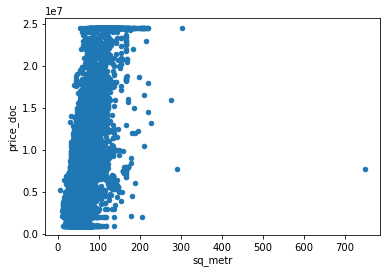

In [80]:
#making a new property called sq meter, taking the maximum value of the full or life (because of na's)

## property square meters
trainsm_df.loc[:, 'sq_metr'] = trainsm_df.loc[:, ['full_sq','life_sq']].max(axis=1)
trainsm_df.loc[trainsm_df['sq_metr'] < 6, 'sq_metr'] = np.nan
#make sure that the zeros are gone
trainsm_df.plot.scatter(x='sq_metr', y='price_doc')

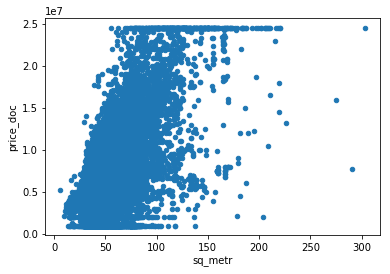

In [82]:
## remove outlier (sq_metr)
trainsm_df = trainsm_df.drop(trainsm_df[trainsm_df['sq_metr'] > 600].index)
#get rid of the one outlier
trainsm_df.plot.scatter(x='sq_metr', y='price_doc')

In [83]:
## property square meters for Test Data
testsm_df.loc[:, 'sq_metr'] = testsm_df.loc[:, ['full_sq','life_sq']].max(axis=1)
testsm_df.loc[testsm_df['sq_metr'] < 6, 'sq_metr'] = np.nan

In [86]:
#check to see if there are any crazy outliers in the test data (there are not)
trainsm_df['sq_metr'].value_counts(dropna=False).sort_index()
testsm_df['sq_metr'].value_counts(dropna=False).sort_index()

 10.00     1
 15.80     1
 15.90     1
 16.80     1
 17.10     1
 17.20     1
 17.40     1
 17.50     1
 18.20     1
 18.70     1
 19.20     1
 19.91     1
 20.10     1
 20.50     1
 20.80     1
 22.00     1
 22.20     1
 22.30     1
 22.40     1
 22.50     3
 22.60     1
 22.80     1
 22.90     1
 23.40     1
 23.56     1
 24.10     1
 24.20     1
 24.70     1
 24.90     2
 25.40     1
          ..
 145.80    1
 149.50    1
 151.50    2
 153.50    1
 154.53    1
 155.60    1
 155.80    1
 155.90    1
 156.53    1
 157.60    1
 157.90    1
 159.40    1
 160.16    1
 163.70    1
 165.00    1
 165.70    1
 165.80    1
 169.30    1
 172.10    1
 184.50    1
 186.90    1
 189.10    1
 197.00    1
 198.40    1
 219.60    1
 232.70    1
 282.00    1
 285.80    1
 314.50    1
NaN        1
Name: sq_metr, Length: 1272, dtype: int64

In [87]:
## adding a log transformation column to the training set:
trainsm_df.loc[:, 'log_price_doc'] = np.log(trainsm_df['price_doc'] + 1)
#make sure that the data is positive -- the log will give a very negative value if it is close to one
trainsm_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sd_mortgage_yearly,sd_rent_yearly,okurg_district,gender_ratio,gender_ratio_work,elder_ratio,youth_ratio,pop_density,sq_metr,log_price_doc
0,1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,2,0.530462,0.467686,0.420052,0.245389,0.024279,43.0,15.581952
1,2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,8,0.551675,0.492521,0.385808,0.206164,0.012029,34.0,15.607270
2,3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,6,0.548195,0.498123,0.248005,0.127748,0.021153,43.0,15.555977
3,4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,3,0.535429,0.501250,1.395840,1.350177,0.014183,89.0,16.388123
4,5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.361158,16.374863,0,0.520139,0.496848,0.949643,0.474396,0.012880,77.0,16.608603


# What's Next??

Now that we have the various features made, we can think about other variables to look at, or just try some modelling based on the ones we already have. What kind of model do you want to use? How do you figure out how good it is going to be? 

In [39]:
#import xgboost as xgb

In [ ]:
#This is to use xgboost once you figure out how to install it


for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df.price_doc.values
train_X = train_df.drop(["id", "timestamp", "price_doc"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()